In [1]:
#import needed libraries

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator as op

pd.set_option('display.line_width', 5000)
pd.set_option('display.max_columns', 60)

print pd.version.version
print np.version.version

line_width has been deprecated, use display.width instead (currently both are
identical)

0.16.2
1.9.2


In [2]:
# Import Housing Assessment Data.  Note that I had to save it as a csv first-- there is also an Excel reader but usually there are issues.

df = pd.read_csv(r'C:\Users\dustin\Desktop\Grouped_HA_Data.csv', index_col=0)

C:\Users\dustin\Anaconda\lib\site-packages\pandas\io\parsers.py:1130: DtypeWarning: Columns (3,39,64,66) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
# Lists the column names
list(df.columns.values)

['LocationID',
 'Address',
 'MobileSN',
 'ClientFirst',
 'ClientLast',
 'City',
 'AKWarmRaterName',
 'Rater_Name',
 'FileName',
 'RatingType',
 'RatingPoints',
 'RatingStars',
 'Rating_Date',
 'OccupancyType',
 'Occupants',
 'HouseType',
 'Bedrooms',
 'LivingUnits',
 'UnitLocation',
 'Electric_Utility',
 'Gas_Utility',
 'Ceiling Height',
 'YearBuilt',
 'WinWallRatio',
 'FloorExpression',
 'FloorArea',
 'GarageSize',
 'EnergyCost',
 'ElectricCost',
 'FuelCost',
 'Birch_MMBTU',
 'Coal_MMBTU',
 'Electric_MMBTU',
 'Gas_MMBTU',
 'Oil1_MMBTU',
 'Oil2_MMBTU',
 'Propane_MMBTU',
 'Spruce_MMBTU',
 'CFM50',
 'ENACH (ACH50)',
 'ENBlowerTestOrEst',
 'VolExpression',
 'Volume',
 'DryerFuel',
 'RangeFuel',
 'OtherUse',
 'SouthWindowArea',
 'UseItemizedLightsAndAppliances',
 'VentType',
 'CITY',
 'SOURCEADDRESSLINE1',
 'CityName',
 'ANCSARegionId',
 'AuditorRegionId',
 'RegionName',
 'DesignHeatLoss',
 'DesignHeatLossGarage',
 'DesignHeatLossMainHome',
 'DHWenergyFactor',
 'HtgSysEffic',
 'NaturalACH'

In [5]:
# Check the bottom to make sure there isn't any weird random numbers that we put in the Excel file
df.tail(20)


,LocationID,Address,MobileSN,ClientFirst,ClientLast,City,AKWarmRaterName,Rater_Name,FileName,RatingType,RatingPoints,RatingStars,Rating_Date,OccupancyType,Occupants,HouseType,Bedrooms,LivingUnits,UnitLocation,Electric_Utility,Gas_Utility,Ceiling Height,YearBuilt,WinWallRatio,FloorExpression,FloorArea,GarageSize,EnergyCost,ElectricCost,FuelCost,...,FloorR,FloorHasGroundR,WallDoorR,WallHasGroundR,WindowR,App_Birch,App_Coal,App_Elec,App_Gas,App_Oil1,App_Oil2,App_Prop,App_Spruce,DHW_Birch,DHW_Coal,DHW_Elec,DHW_Gas,DHW_Oil1,DHW_Oil2,DHW_Prop,DHW_Spruce,Space_Birch,Space_Coal,Space_Elec,Space_Gas,Space_Oil1,Space_Oil2,Space_Prop,Space_Spruce,Total Energy
ProjectID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
146437,88371,1562 FIDDLE WAY,NaN,Don and Adrienne,Lee,FAIRBANKS,Terry Duszynski,Terry Duszynski,"Lee, Don and Adrienne 1562 Fiddle Way 8-9-12.hm2",From_Plans,94.1,5.5,8/9/2012,Owner_Occupied,2,Single_Family,3,0,Missing,Golden Valley Electric - Residential,Fairbanks Natural Gas - Residential,13.0,2012,0.127814,22.41*28.33~635-36,"1,233.9",0,"$3,289",0,0,...,24.796207,True,30.743023,False,5.000000,0,0,23.044300,0.00000,0,0,0,0,0,0,0.000000,0.000000,12.64260,0.000000,0.00000,0,0,0,0.384911,0.000000,42.3402,0.00000,0.00000,0.000000,78.4
132771,88579,252 .6 PARKS HWY,NaN,Michelle,Vlah,HEALY,LYNN A. KUHL,NaN,MVAG252.hm2,From_Plans,95.5,5.5,3/12/2012,Owner_Occupied,4,Single_Family,3,0,Missing,Golden Valley Electric - Residential,NaN,18.0,2012,0.089577,1980,"1,980.0",2,"$4,532",0,0,...,39.632935,True,31.126625,False,5.000000,0,0,28.147900,0.00000,0,0,0,0,0,0,0.000000,0.000000,0.00000,25.691200,0.00000,0,0,0,0.607214,0.000000,0.0000,65.91470,0.00000,0.000000,120.4
121956,85675,Lot 1 Blk 41 Hamilton Acres,NaN,Aurora,Builders,FAIRBANKS,Bryan Duszynski,Bryan Duszynski,Aurora Builders Thies Residence 8-14-09.hm2,From_Plans,94.5,5.5,8/14/2009,Owner_Occupied,4,Single_Family,3,0,Missing,Golden Valley Electric - Residential,Fairbanks Natural Gas - Residential,25.0,2009,0.053393,(58.6*30.6)*2,"3,586.3",4,"$4,380",0,0,...,32.614407,True,31.607126,False,3.571429,0,0,37.495700,0.00000,0,0,0,0,0,0,0.000000,0.000000,0.00000,30.414400,0.00000,0,0,0,1.042170,0.000000,0.0000,121.38200,0.00000,0.000000,190.3
50691,56464,6908 N ELWOOD NURSE CT,NaN,NATHAN,MAY,WASILLA,David R. Owens,Dave Owens,C:\Domains\akrebate.com\wwwroot\AkWarmFiles\MN...,From_Plans,96.5,5.5,6/10/2009,Owner_Occupied,2,Single_Family,3,0,Missing,Matanuska Electric Assn. - Residential,Enstar Natural Gas- Residential,19.0,2008,0.064039,1216+1064,"2,280.0",0,"$2,426",0,0,...,29.462019,True,34.061530,False,3.125000,0,0,30.035316,0.00000,0,0,0,0,0,0,0.000000,0.000000,0.00000,12.941294,0.00000,0,0,0,0.318136,0.000000,0.0000,39.36936,0.00000,0.000000,82.7
134124,85078,62 SKYLINE DR,NaN,Gerard,Garland,HAINES,John White,John White,0307121.hm2,From_Plans,92.0,5.5,3/7/2012,Owner_Occupied,3,Single_Family,2,0,Missing,Haines-APT - Residential,NaN,24.0,2011,0.125498,916+818,"1,734.0",0,"$4,530",0,0,...,33.772930,True,34.815895,True,3.333333,0,0,25.263600,0.00000,0,0,0,0,0,0,17.587500,0.000000,0.00000,0.000000,0.00000,0,0,0,25.951900,0.000000,0.0000,0.00000,0.00000,11.090500,79.9
123040,86040,321 SAPPHIRE,NaN,Eli,Sonafrank,ESTER,Lynn A Kuhl,Lynn Kuhl,ES321.hm2,From_Plans,95.7,5.5,6/6/2011,Owner_Occupied,4,Single_Family,3,0,Missing,Golden Valley Electric - Residential,NaN,23.0,2011,0.061224,1920,"1,920.0",0,"$3,791",0,0,...,37.211327,True,35.272940,True,4.545454,0,0,26.896000,0.00000,0,0,0,0,0,0,0.000000,0.000000,0.00000,27.291500,0.00000,0,0,0,0.506872,0.000000,0.0000,57.54620,0.00000,0.000000,112.2
146452,87062,HILLTOP RD,NaN,Jim,harp,HEALY,Terry Duszynski,Terry Duszynski,"Sharp, Jim Healy 7-5-12.hm2",From_Plans,93.4,5.5,7/5/2012,Owner_Occupied,2,Single_Family,2,0,Missing,Golden Valley Electric - Residential,NaN,22.0,2012,0.128899,Main : 28*40~Top: 1120-(13*22)~Entry: 8*20,"2,114.0",0,"$5,285",0,0,...,22.364150,True,36.470905,True,5.000000,0,0,27.337900,0.00000,0,0,0,0,0,0,0.000000,0.0000

In [6]:
# Check the data types to make sure it imported correctly
df.dtypes

LocationID           int64
Address             object
MobileSN            object
ClientFirst         object
ClientLast          object
City                object
AKWarmRaterName     object
Rater_Name          object
FileName            object
RatingType          object
RatingPoints       float64
RatingStars        float64
Rating_Date         object
OccupancyType       object
Occupants            int64
...
DHW_Elec        float64
DHW_Gas         float64
DHW_Oil1        float64
DHW_Oil2        float64
DHW_Prop        float64
DHW_Spruce      float64
Space_Birch     float64
Space_Coal      float64
Space_Elec      float64
Space_Gas       float64
Space_Oil1      float64
Space_Oil2      float64
Space_Prop      float64
Space_Spruce    float64
Total Energy    float64
Length: 92, dtype: object

In [3]:
# Defines a function for taking the yearbuilt and changing it into decade built
def decadebuilt(x):
    yearbuilt = float(x)
    if yearbuilt < 1940:
        return "Pre-1940s"
    elif yearbuilt >= 1940 and yearbuilt < 1950:
        return "1940s"
    elif yearbuilt >= 1950 and yearbuilt < 1960:
        return "1950s"
    elif yearbuilt >= 1960 and yearbuilt < 1970:
        return "1960s"
    elif yearbuilt >= 1970 and yearbuilt < 1980:
        return "1970s"
    elif yearbuilt >= 1980 and yearbuilt < 1990:
        return "1980s"
    elif yearbuilt >= 1990 and yearbuilt < 2000:
        return "1990s"
    elif yearbuilt >= 2000:
        return "2000s"
    else: 
        return "Year Built Error"

# uses the function above to create a new column and then checks the first 20 rows to make sure that it worked.

df['DecadeBuilt'] = df['YearBuilt'].map(lambda x: decadebuilt(x))
df[:20]

,LocationID,Address,MobileSN,ClientFirst,ClientLast,City,AKWarmRaterName,Rater_Name,FileName,RatingType,RatingPoints,RatingStars,Rating_Date,OccupancyType,Occupants,HouseType,Bedrooms,LivingUnits,UnitLocation,Electric_Utility,Gas_Utility,Ceiling Height,YearBuilt,WinWallRatio,FloorExpression,FloorArea,GarageSize,EnergyCost,ElectricCost,FuelCost,...,FloorHasGroundR,WallDoorR,WallHasGroundR,WindowR,App_Birch,App_Coal,App_Elec,App_Gas,App_Oil1,App_Oil2,App_Prop,App_Spruce,DHW_Birch,DHW_Coal,DHW_Elec,DHW_Gas,DHW_Oil1,DHW_Oil2,DHW_Prop,DHW_Spruce,Space_Birch,Space_Coal,Space_Elec,Space_Gas,Space_Oil1,Space_Oil2,Space_Prop,Space_Spruce,Total Energy,DecadeBuilt
ProjectID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
137818,117878,8250 A AND B AMCHITKA,NaN,Jack,Stewart Jr,ADAK,Dave Harrell,Dave Harrell,JackStewart Jr117878.hm2,As_Is,60.2,2.5,5/28/2012,Owner_Occupied,4,Single_Family,6,0,Missing,Self Generated Power (oil) - Residential,NaN,9.5,1964,0.076738,(23.25*109)+(18*3.5*2)-(20*14)~(24*3.55),"2,465.5",0,"$23,712",5400,6000,...,True,5.785288,True,1.406496,0,0,29.2564,0,0,0,0.00000,0,0,0,0.00000,0,0,28.26250,0,0,0,0,8.982950,0,0,345.4120,0,0.0000,411.9,1960s
137819,117880,226 A AND B KULUK HOUSING,NaN,Tina,Romberg,ADAK,Dave Harrell,Dave Harrell,TinaRomberg117880.hm2,As_Is,46.6,1.5,5/29/2012,Owner_Occupied,1,Single_Family,6,2,Missing,Self Generated Power (oil) - Residential,NaN,9.5,1964,0.076738,2465.5,"2,465.5",0,"$28,992",0,14400,...,True,5.798532,True,1.406496,0,0,29.2567,0,0,0,0.00000,0,0,0,0.00000,0,0,7.97899,0,0,0,0,16.504200,0,0,457.5960,0,0.0000,511.3,1960s
137835,117895,247 B AMCHITKA,NaN,Julie,Plummer,ADAK,Dave Harrell,Dave Harrell,JuliePlummer117895.hm2,As_Is,46.3,1.5,6/3/2012,Owner_Occupied,3,Single_Family,6,0,Missing,Self Generated Power (oil) - Residential,NaN,9.5,1964,0.076738,2465.5,"2,465.5",0,"$27,152",4200,9600,...,True,5.798532,True,1.470297,0,0,29.2567,0,0,0,0.00000,0,0,0,0.00000,0,0,21.50140,0,0,0,0,13.326100,0,0,416.9150,0,0.0000,481.0,1960s
137827,117885,252 A AMCHITKA,NaN,Crystal,Helmericks,ADAK,Dave Harrell,Dave Harrell,CrystalHelmericks117885.hm2,As_Is,47.9,1.5,5/29/2012,Owner_Occupied,4,Multi_Family_Whole_Building,6,2,Missing,Self Generated Power (oil) - Residential,NaN,9.5,1964,0.076738,2465.5,"2,465.5",0,"$31,281",0,0,...,True,5.787339,True,1.406496,0,0,45.0548,0,0,0,0.00000,0,0,0,0.00000,0,0,28.82400,0,0,0,0,14.017400,0,0,388.6460,0,0.0000,476.5,1960s
137817,5525,242 AMCHITKA DR A,NaN,Doug,Newman,ADAK,Dave Harrell,Dave Harrell,DougNewman5525.hm2,As_Is,43.5,1.5,5/28/2012,Owner_Occupied,3,Multi_Family_One_Unit,2,2,Full_Height,Self Generated Power (oil) - Residential,NaN,9.5,1964,0.071752,(23*49.3)-(10*15)-(1*4)~(3.5*15)+(3.5*12.3),"1,075.5",0,"$17,642",4200,7000,...,True,5.671523,True,1.364835,0,0,21.6687,0,0,0,0.00000,0,0,0,0.00000,0,0,21.50140,0,0,0,0,8.103990,0,0,224.6910,0,0.0000,276.0,1960s
137823,118537,244 AMCHITKA,NaN,Kathy,Mohn,ADAK,Dave Harrell,Dave Harrell,KathyMohn118537.hm2,As_Is,45.6,1.5,5/30/2012,Owner_Occupied,2,Single_Family,6,2,Full_Height,Self Generated Power (oil) - Residential,NaN,9.5,1964,0.070029,(27.6*22)+(24.1*26.5)+(23.5*24.1)+(20*27.6)~(9...,"2,644.1",0,"$30,701",4500,9000,...,True,5.892084,True,1.413823,0,0,27.6544,0,0,0,5.12811,0,0,0,0.00000,0,0,14.74020,0,0,0,0,17.873900,0,0,495.5720,0,0.0000,561.0,1960s
137821,117886,102 D CAMEL,NaN,Everett,Eickhoff,ADAK,Dave Harrell,Dave Harrell,EverettEickhoff117886.hm2,As_Is,76.2,3.5,5/31/2012,Owner_Occupied,1,Multi_Family_One_Unit,2,4,Full_Height,Self Generated Power (oil) - Residential,NaN,18.0,1982,0.072272,(24.5*11.5)+(11.5*38.5)+(11.5*36.5)+(11.5*11),"1,270.8",0,"$10,017",3600,6000,...,False,13.731536,False,2.380952,0,0,22.7348,0,0,0,0.00000,0,0,0,0.00000,0,0,15.97250,0,0,0,0,0.561282,0,0,79.3813,0,0.0000,118.6,1980s
137820,117881,112 A SANDY COVE,NaN,Joe,Galaktionoff,ADAK,Dave Harrell,Dave Harrell,JoeGalaktionoff117881.hm2,As_Is,72.2,3.0,6/1/2012,Owner_Occupied,2,Multi_Family_One_Unit,2,4,Full_Height,Self Generated Pow

In [4]:
df['DecadeBuilt'].unique()

array(['1960s', '1980s', '1990s', 'Pre-1940s', '2000s', '1970s', '1950s',
       'Year Built Error', '1940s'], dtype=object)

In [5]:
# Finds the average for each city for each decade built.  Check out how little code it needs.
%time

decadebuilt = df.groupby(['RatingType', 'City', 'DecadeBuilt']).mean()
decadebuilt

Wall time: 0 ns


LocationID  RatingPoints  RatingStars  Occupants  Bedrooms  LivingUnits  Ceiling Height    YearBuilt  WinWallRatio  GarageSize  ElectricCost     FuelCost  Birch_MMBTU  Coal_MMBTU  Electric_MMBTU   Gas_MMBTU  Oil1_MMBTU  Oil2_MMBTU  Propane_MMBTU  Spruce_MMBTU  ENACH (ACH50)         Volume  SouthWindowArea  UseItemizedLightsAndAppliances  ANCSARegionId  AuditorRegionId  DesignHeatLoss  DesignHeatLossGarage  DesignHeatLossMainHome  DHWenergyFactor       ...         NaturalACH   CeilingR     FloorR  WallDoorR   WindowR  App_Birch  App_Coal    App_Elec   App_Gas  App_Oil1  App_Oil2   App_Prop  App_Spruce  DHW_Birch  DHW_Coal   DHW_Elec    DHW_Gas   DHW_Oil1   DHW_Oil2   DHW_Prop  DHW_Spruce  Space_Birch  Space_Coal  Space_Elec   Space_Gas  Space_Oil1  Space_Oil2  Space_Prop  Space_Spruce  Total Energy
RatingType City           DecadeBuilt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ...                                                                                                                                                                                                                                                                                                                                                             
As_Is      ADAK           1960s              99266.666667     48.350000     1.666667   2.833333  5.333333     1.333333        9.500000  1964.000000      0.074789    0.000000   3050.000000  7666.666667          NaN         NaN       43.492707         NaN         NaN  408.606748       5.128110           NaN      10.629829   26985.908333              NaN                        0.000000             20                3    61852.689017              0.000000            61852.689017         0.760000       ...           0.707030  12.464627  19.103226   5.788883  1.411407          0         0   30.357950  0.000000         0         0   0.854685           0          0         0   0.000000   0.000000   0.000000  20.468082   0.000000           0     0.000000    0.000000   13.134757    0.000000    0.000000  388.138667    0.000000      0.000000    452.950000
                          1980s              79329.333333     72.100000     3.000000   2.000000  2.666667     3.333333       18.000000  1983.666667      0.083963    0.000000   1200.000000  2000.000000          NaN         NaN       26.482153         NaN         NaN  144.228900            NaN           NaN       8.235961   14977.466667              NaN                        0.000000             20                3    24293.519200              0.000000            24293.519200         0.550000       ...           0.666558  36.854202  18.252565  13.378598  2.380952          0         0   25.540600  0.000000         0         0   0.000000           0          0         0   0.000000   0.000000   0.000000  22.733700   0.000000           0     0.000000    0.000000    0.941553    0.000000    0.000000  121.495200    0.000000      0.000000    170.700000
           AKIACHAK       1960s              86368.000000     72.700000     3.000000   3.000000  2.000000     0.000000        7.110000  1960.000000      0.033275    0.000000      0.000000     0.000000          NaN         NaN       12.863400         NaN         NaN   21.501400            NaN     88.880900      12.159189            NaN              NaN                             NaN             21                3             NaN                   NaN                     NaN         0.760000       ...           0.879926  31.010891  32.006912  11.419316  1.063830          0         0   12.863400  0.000000         0  

In [6]:
# Writes the last part to an Excel file in the Ipy Notebook directory

decadebuilt.to_excel('HA_Average_Summary.xls', sheet_name='HA_Average_Summary')

In [8]:
decadebuiltmed = df.groupby(['RatingType', 'City', 'DecadeBuilt']).median()
decadebuiltmed

LocationID  RatingPoints  RatingStars  Occupants  Bedrooms  LivingUnits  Ceiling Height  YearBuilt  WinWallRatio  GarageSize  ElectricCost  FuelCost  Birch_MMBTU  Coal_MMBTU  Electric_MMBTU   Gas_MMBTU  Oil1_MMBTU  Oil2_MMBTU  Propane_MMBTU  Spruce_MMBTU  ENACH (ACH50)     Volume  SouthWindowArea  UseItemizedLightsAndAppliances  ANCSARegionId  AuditorRegionId  DesignHeatLoss  DesignHeatLossGarage  DesignHeatLossMainHome  DHWenergyFactor       ...         NaturalACH   CeilingR     FloorR  WallDoorR   WindowR  App_Birch  App_Coal    App_Elec   App_Gas  App_Oil1  App_Oil2   App_Prop  App_Spruce  DHW_Birch  DHW_Coal   DHW_Elec    DHW_Gas   DHW_Oil1   DHW_Oil2   DHW_Prop  DHW_Spruce  Space_Birch  Space_Coal  Space_Elec   Space_Gas  Space_Oil1  Space_Oil2  Space_Prop  Space_Spruce  Total Energy
RatingType City           DecadeBuilt                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ...                                                                                                                                                                                                                                                                                                                                                             
As_Is      ADAK           1960s               117882.5         46.45         1.50        3.0       6.0            2           9.500     1964.0      0.076738         0.0       4200.00    8000.0          NaN         NaN       44.055550         NaN         NaN  427.943200       5.128110           NaN      10.726761  28277.875              NaN                               0             20                3     66152.96485              0.000000             66152.96485            0.760       ...           0.713477  12.463779  19.318735   5.792936  1.406496          0         0   29.256550  0.000000         0         0   0.000000           0          0         0   0.000000   0.000000   0.000000  21.501400   0.000000           0     0.000000           0   13.671750    0.000000    0.000000  402.780500           0      0.000000        478.75
                          1980s               117881.0         72.20         3.00        2.0       2.0            4          18.000     1982.0      0.083882         0.0          0.00       0.0          NaN         NaN       23.589527         NaN         NaN  103.663000            NaN           NaN       8.124255  10837.600              NaN                               0             20                3     16427.56640              0.000000             16427.56640            0.550       ...           0.657517  36.854202  11.257675  13.371264  2.380952          0         0   23.017300  0.000000         0         0   0.000000           0          0         0   0.000000   0.000000   0.000000  22.733700   0.000000           0     0.000000           0    0.572227    0.000000    0.000000   80.929300           0      0.000000        127.30
           AKIACHAK       1960s                86368.0         72.70         3.00        3.0       2.0            0           7.110     1960.0      0.033275         0.0          0.00       0.0          NaN         NaN       12.863400         NaN         NaN   21.501400            NaN     88.880900      12.159189        NaN              NaN                             NaN             21                3             NaN                   NaN                     NaN            0.760       ...           0.879926  31.010891  32.006912  11.419316  1.063830          0         0   12.863400  0.000000         0         0   0.000000           0          0         0   0.

In [17]:
decadebuiltmed.to_excel('HA_Median_Summary.xls', sheet_name='HA_Median_Summary')

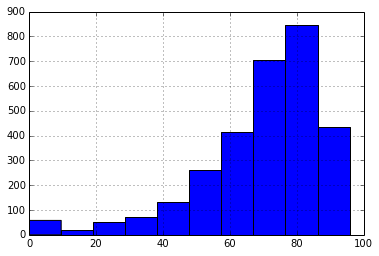

In [9]:
decadebuiltmed['RatingPoints'].hist()